
<h1 align="center"><font size="5">Classification with Python</font></h1>


<h2>Table of Contents</h2>
    <ul>
    <li>Introduction</li>
    <li>About the Data</li>
    <li>Importing Data</li>
    <li>Data Preprocessing</li>
    <li>One Hot Encoding</li>
    <li>Train and Test Data Split</li>
    <li>Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</li>
    </ul>

## Introduction


In this notebook, we apply some of the classification algorithms.

Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics.

We will use the following algorithms:

1.  Linear Regression
2.  KNN
3.  Decision Trees
4.  Logistic Regression
5.  SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, we will use our models to generate the report at the end.


## About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


This dataset contains observations of weather metrics for each day from 2008 to 2017. The **Weather_Data.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


## Import the required libraries


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from matplotlib import pyplot as plt

### Importing the Dataset


In [3]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [4]:
df = pd.read_csv(path)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [5]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [6]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Predictor Variable and Target Variable

Now, we set our 'features' or x values and our Y or target variable.


In [7]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [8]:
df_sydney_processed = df_sydney_processed.astype(float)

In [9]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Split data into training and testing dataset

In [10]:
x_train, x_test, y_train, y_test = train_test_split(features,Y,test_size=0.2,random_state=10)

### Linear Regression


#### Training

In [11]:
LinearReg = LinearRegression()
LinearReg.fit(x_train,y_train)

LinearRegression()

#### Evaluation

In [12]:
predictions = LinearReg.predict(x_test)

In [13]:
LinearRegression_MAE = round(np.mean(np.absolute(y_test-predictions)),3)
LinearRegression_MSE = round(metrics.mean_squared_error(y_test,predictions),3)
LinearRegression_R2 = round(metrics.r2_score(y_test,predictions),3)

In [14]:
ReportR = pd.DataFrame({'MAE':[LinearRegression_MAE],'MSE':[LinearRegression_MSE],'R2':[LinearRegression_R2]})

In [15]:
ReportR

,MAE,MSE,R2
0,0.256,0.116,0.427


### KNN


#### Training

In [16]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

#### Evaluation

In [17]:
predictions = KNN.predict(x_test)

In [18]:
KNN_Accuracy_Score = round(accuracy_score(y_test,predictions),3)
KNN_JaccardIndex = round(jaccard_score(y_test,predictions,pos_label=0),3)
KNN_F1_Score = round(f1_score(y_test,predictions,average='weighted'),3)

In [19]:
ReportKNN=pd.DataFrame({'Accuracy_Score':[KNN_Accuracy_Score],'Jaccard_Index':[KNN_JaccardIndex],'F1_Score':[KNN_F1_Score]})
ReportKNN

,Accuracy_Score,Jaccard_Index,F1_Score
0,0.818,0.79,0.802


In [20]:
cnf_matrixKNN=confusion_matrix(y_test,predictions,labels=[1,0])

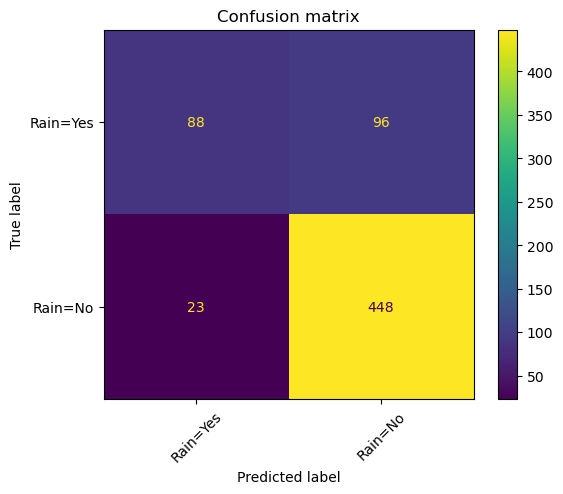

In [21]:
plt.figure
disp=metrics.ConfusionMatrixDisplay(cnf_matrixKNN,display_labels=['Rain=Yes','Rain=No'])
disp.plot()
plt.title('Confusion matrix')
plt.xticks(rotation=45)
plt.show()

### Decision Tree


#### Training

In [22]:
Tree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
Tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Evaluation

In [23]:
predictions = Tree.predict(x_test) 

In [24]:
Tree_Accuracy_Score = round(accuracy_score(y_test,predictions),3)
Tree_JaccardIndex = round(jaccard_score(y_test,predictions,pos_label=0),3)
Tree_F1_Score = round(f1_score(y_test,predictions,average='weighted'),3)

In [25]:
ReportTree=pd.DataFrame({'Accuracy_Score':[Tree_Accuracy_Score],'Jaccard_Index':[Tree_JaccardIndex],'F1_Score':[Tree_F1_Score]})
ReportTree

,Accuracy_Score,Jaccard_Index,F1_Score
0,0.818,0.782,0.813


In [26]:
cnf_matrixTree=confusion_matrix(y_test,predictions,labels=[1,0])

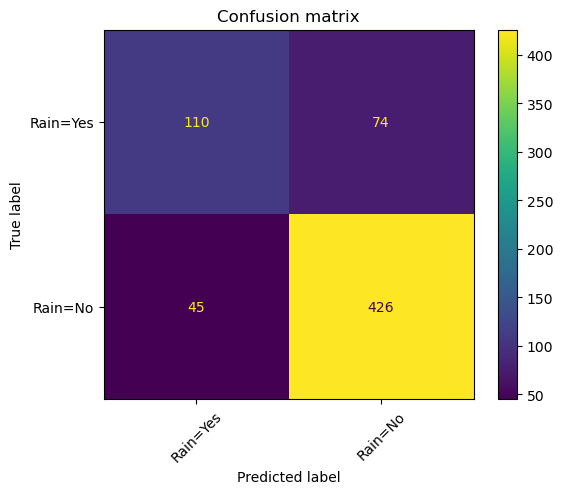

In [27]:
plt.figure
disp=metrics.ConfusionMatrixDisplay(cnf_matrixTree,display_labels=['Rain=Yes','Rain=No'])
disp.plot()
plt.title('Confusion matrix')
plt.xticks(rotation=45)
plt.show()

### Split data into training and testing dataset

In [28]:
x_train, x_test, y_train, y_test = train_test_split(features,Y,test_size=0.2,random_state=1)

### Logistic Regression


#### Training

In [29]:
LR = LogisticRegression(C=0.01,solver='liblinear')
LR.fit(x_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

#### Evaluation

In [30]:
predictions = LR.predict(x_test)

In [31]:
predict_proba = LR.predict_proba(x_test)

In [32]:
LR_Accuracy_Score = round(accuracy_score(y_test,predictions),3)
LR_JaccardIndex = round(jaccard_score(y_test,predictions,pos_label=0),3)
LR_F1_Score = round(f1_score(y_test,predictions,average='weighted'),3)
LR_Log_Loss = round(log_loss(y_test,predict_proba),3)

In [33]:
ReportLR=pd.DataFrame({'Accuracy_Score':[LR_Accuracy_Score],'Jaccard_Index':[LR_JaccardIndex],'F1_Score':[LR_F1_Score],'Log_Loss':[LR_Log_Loss]})
ReportLR

,Accuracy_Score,Jaccard_Index,F1_Score,Log_Loss
0,0.827,0.794,0.821,0.38


In [34]:
cnf_matrixLR=confusion_matrix(y_test,predictions,labels=[1,0])

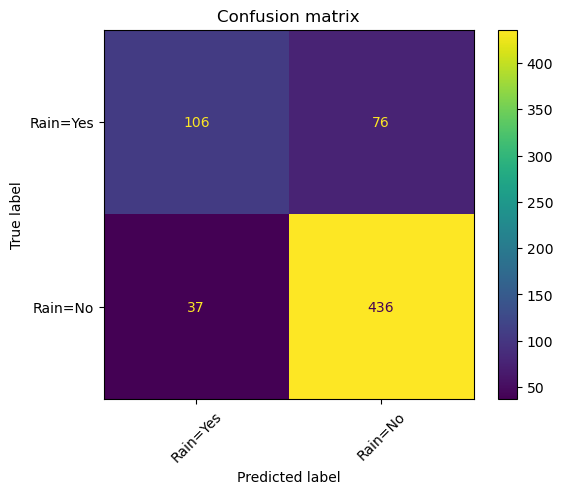

In [35]:
plt.figure
disp=metrics.ConfusionMatrixDisplay(cnf_matrixLR,display_labels=['Rain=Yes','Rain=No'])
disp.plot()
plt.title('Confusion matrix')
plt.xticks(rotation=45)
plt.show()

### SVM


#### Training

In [36]:
SVM = svm.SVC(kernel='rbf')
SVM.fit(x_train,y_train)

SVC()

#### Evaluation

In [37]:
predictions = SVM.predict(x_test)

In [38]:
SVM_Accuracy_Score = round(accuracy_score(y_test,predictions),3)
SVM_JaccardIndex = round(jaccard_score(y_test,predictions,pos_label=0),3)
SVM_F1_Score = round(f1_score(y_test,predictions,average='weighted'),3)

In [39]:
ReportSVM=pd.DataFrame({'Accuracy_Score':[SVM_Accuracy_Score],'Jaccard_Index':[SVM_JaccardIndex],'F1_Score':[SVM_F1_Score]})
ReportSVM

,Accuracy_Score,Jaccard_Index,F1_Score
0,0.722,0.722,0.606


In [40]:
cnf_matrixSVM=confusion_matrix(y_test,predictions,labels=[1,0])

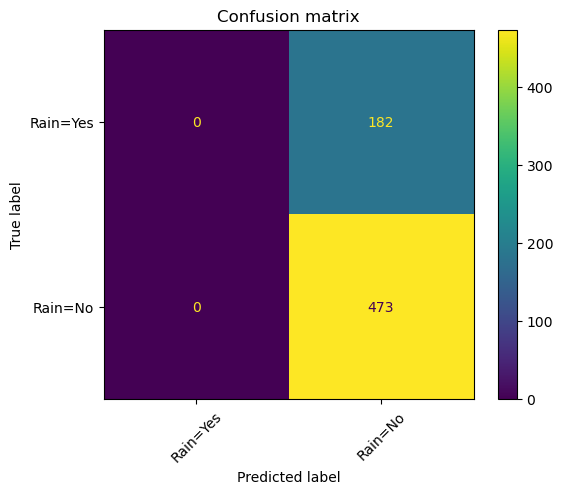

In [41]:
plt.figure
disp=metrics.ConfusionMatrixDisplay(cnf_matrixSVM,display_labels=['Rain=Yes','Rain=No'])
disp.plot()
plt.title('Confusion matrix')
plt.xticks(rotation=45)
plt.show()

### Report


#### Comparison of classification models

In [42]:
models=['KNN','Decision Tree','Logistic Regression','SVM']
list=[ReportKNN,ReportTree,ReportLR,ReportSVM]

In [43]:
all_data=[]
for mod,rep in zip(models,list):
    data=dict(Model=mod,Accuracy_Score=rep.Accuracy_Score[0],Jaccard_Index=rep.Jaccard_Index[0],F1_Score=rep.F1_Score[0])
    all_data.append(data)

In [44]:
Report = pd.DataFrame(all_data)
Report.set_index('Model',inplace=True)

Report['Log_Loss']=np.nan
Report.loc['Logistic Regression','Log_Loss']=ReportLR.Log_Loss[0]
Report

,Accuracy_Score,Jaccard_Index,F1_Score,Log_Loss
Model,,,,
KNN,0.818,0.790,0.802,NaN
Decision Tree,0.818,0.782,0.813,NaN
Logistic Regression,0.827,0.794,0.821,0.38
SVM,0.722,0.722,0.606,NaN
